# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 rows of data with 1 header, 399 sets of observations, 2 missing data in gre and gpa and 1 missing data in prestige

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because the basis of the scoring is different resulting in wider range. GRE is in the hundreds with maximum score of 800 while GPA is only up to maximum score of 4

#### Question 4. Drop data points with missing data


In [5]:
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [6]:
df_cleaned = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: do a test to see any null left

In [7]:
df_cleaned.isnull().values.any()

False

In [8]:
df_cleaned.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

<function matplotlib.pyplot.show>

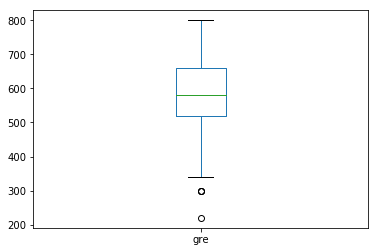

In [9]:
#boxplot 1
df_cleaned['gre'].plot(kind='box')
plt.show

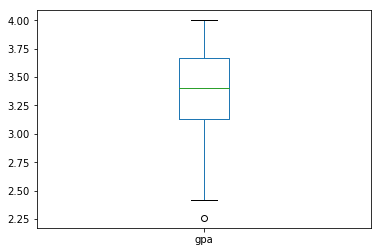

In [10]:
#boxplot 2 
df_cleaned['gpa'].plot(kind = 'box')

In [11]:
df_cleaned.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [12]:
df_cleaned.median()

admit         0.0
gre         580.0
gpa           3.4
prestige      2.0
dtype: float64

In [13]:
df_cleaned.mode()

,admit,gre,gpa,prestige
0,0,620.0,4.0,2.0


#### Question 7. What do this plots show?

Answer: 'gpa' shows a wider variation amongst the lowest quartile group. It's distribution is skewed to the left
'gre' seems to indicate a symmetrical distribution

#### Question 8. Describe each distribution 

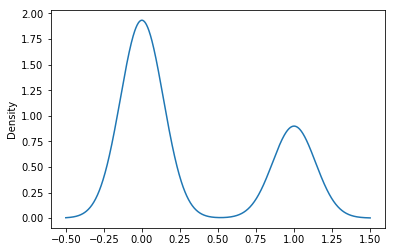

In [14]:
df_cleaned['admit'].plot.kde()

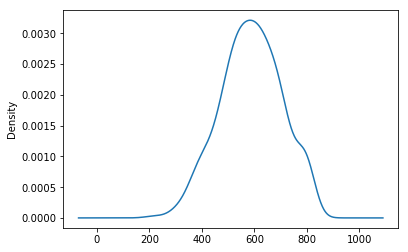

In [15]:
df_cleaned['gre'].plot.kde()

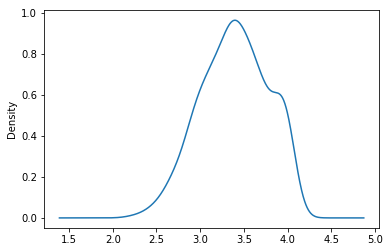

In [16]:
df_cleaned['gpa'].plot.kde()

<function matplotlib.pyplot.show>

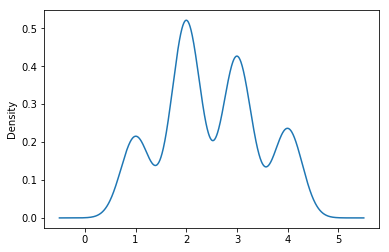

In [17]:
df_cleaned['prestige'].plot.kde()
plt.show

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes because model building is based on normal distribution assumption. 'gre' and 'gpa' are skewed

#### Question 11. Which of our variables are potentially colinear? 

In [18]:
# create a correlation matrix for the data
df_cleaned.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: gre and gpa are potentially collinear. Admit has positive correlation with gpa and gre. Prestige has negative correlation with all other variables

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:
1. Load data to jupyter notebook. Run code to see the size and type of data.
2. Look at the descriptive statistics
3. Identify null value / missing data and decide whether to remove or replace missing data
4. Check for correlation
5. Check data distribution using box plot, density plot and histogram
6. Identify outliers and decide what to do with them
7. Use model_selection.train split data into test and training datasets
8. Create and fit linear regression using SKlearn
7. Calculate RMSE for test and training data
8. Perform 10fold cross validation using kfold and obtain the mean RMSE

#### Question 14. What is your hypothesis? 

Answer: 
1. Null hypothesis: there is no relationship between grad school admission rates and the prestige score of undergraduate school and whether candidate from higher / lower prestige undergraduate school will have higher/ lower chance of admission
2. Alternative hypothesis: candidates from lower prestige undergraduate school is more likely to be admitted to grad school

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

In [19]:
df_raw.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

#### 3. Advanced: Impute missing data

In [20]:
df_nan = df_raw
df_nan.iloc[[187, 212, 236]]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [48]:
#fill missing data with mean value
df_nan['gre'].fillna(df_nan['gre'].mean(),inplace=True)
df_nan['gpa'].fillna(df_nan['gpa'].mean(),inplace=True)
df_nan['prestige'].fillna(df_nan['prestige'].mode()[0],inplace=True)
df_nan.iloc[[187, 212, 236]]

,admit,gre,gpa,prestige
187,0,588.040201,3.39093,2.0
212,0,588.040201,2.87000,2.0
236,1,660.000000,3.39093,2.0


In [47]:
x = df_nan['prestige'].mode()
x[0]

2.0

In [23]:
df_nan['gre'].mean()

588.0402010050252